In [2]:
from mne import read_evokeds
from mne.datasets import sample
import matplotlib.pyplot as plt

"""
1. 读取文件得到evoked数据, 仅以 Left Auditory 为例
"""
data_path = str(sample.data_path())
fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
condition = 'Left Auditory'
evoked = read_evokeds(fname, condition=condition, baseline=(None, 0), proj=True)

Reading C:\Users\mrrai\mne_data\MNE-sample-data\MEG\sample\sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


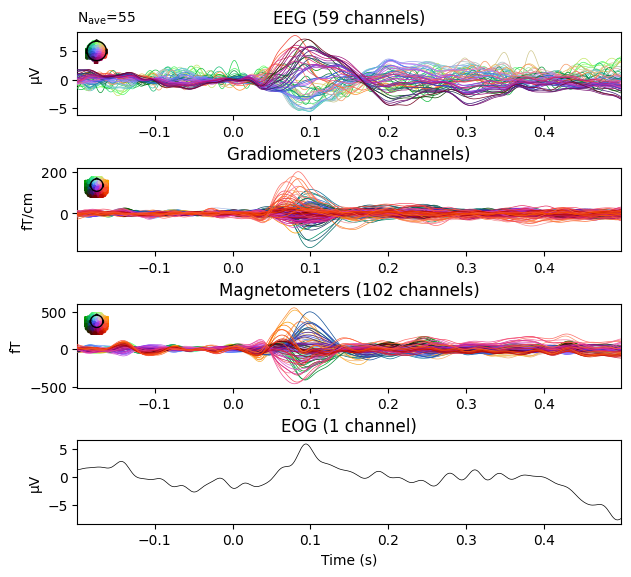

In [4]:
evoked.plot(exclude='bads', time_unit='s')
plt.show()


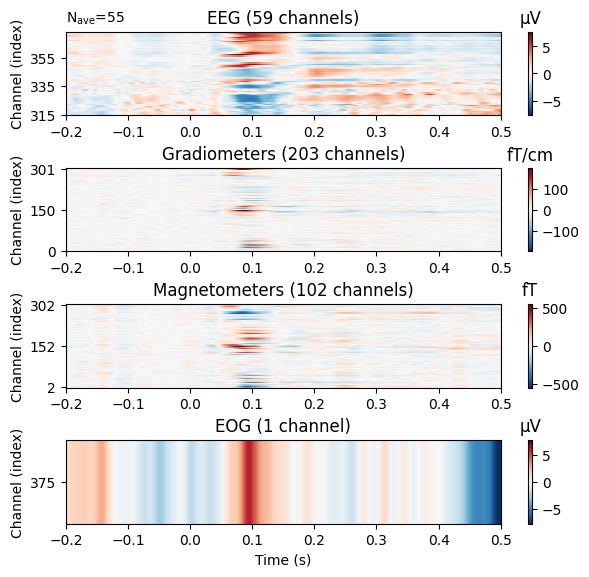

In [6]:
evoked.plot_image(exclude='bads', time_unit='s')
plt.show()


## MNE 从头创建Evoked对象
在实际过程中，有时需要从头自动构建数据来创建Evoked对象，
方式：利用mne.EvokedArray创建Evoked对象，创建时直接构建numpy数组即可，数组的形状必须是(n_epochs, n_chans, n_times)

数据对应的单位：
V: eeg, eog, seeg, emg, ecg, bio, ecog
T: mag
T/m: grad
M: hbo, hbr
Am: dipole
AU: misc

### 构建一个大小为10x5x200的三维数组，数组中数据是随机数；
第一维数据表示：10 epochs
第二维数据表示：5 channels
第三维数据表示：2 seconds per epoch

In [9]:
import numpy as np
import mne
# 采样频率
sfreq = 100
data = np.random.randn(10, 5, sfreq * 2)

# 创建一个info结构
info = mne.create_info(
    ch_names=['MEG1', 'MEG2', 'EEG1', 'EEG2', 'EOG'],
    ch_types=['grad', 'grad', 'eeg', 'eeg', 'eog'],
    sfreq=sfreq
)


<Evoked | 'Smiley faces' (average, N=10), -0.1 – 1.89 sec, baseline off, 5 ch, ~18 kB>
Need more than one channel to make topography for grad. Disabling interactivity.


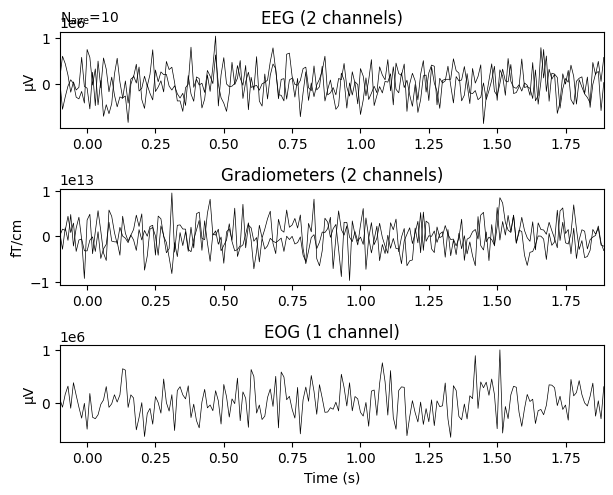

In [10]:
# 设置事件开始前时间为-0.1s
tmin = -0.1
# 对数据求平均
data_evoked = data.mean(0)
# epochs的数量
nave = data.shape[0]
# 给evoked起一个名称
comment = "Smiley faces"
# 利用 mne.EvokedArray 创建Evoked对象
evoked_array = mne.EvokedArray(data_evoked, info, tmin, comment=comment, nave=nave)
print(evoked_array)
evoked_array.plot(time_unit='s')
plt.show()